In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Any results you write to the current directory are saved as output.

In [2]:
DATASET_PATH = "/kaggle/input/fashion-product-images-small/myntradataset/"
print(os.listdir(DATASET_PATH))

['images', 'styles.csv']


In [3]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=50000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,56020,Women,Personal Care,Lips,Lipstick,Purple,Spring,2017.0,Casual,Colorbar Soft Touch Felin Lipstick 036,56020.jpg
1,58439,Women,Apparel,Dress,Dresses,Black,Summer,2012.0,Casual,AND by Anita Dongre Women Black Dress,58439.jpg
2,4936,Women,Apparel,Dress,Dresses,Black,Summer,2011.0,Casual,Gini and Jony Girl's Veata White Black Pink In...,4936.jpg
3,23472,Men,Accessories,Scarves,Scarves,Purple,Winter,2015.0,Casual,Lino Perros Men Purple Scarf,23472.jpg
4,44669,Women,Apparel,Topwear,Shirts,White,Summer,2012.0,Casual,Wills Lifestyle Women White Shirt,44669.jpg
5,8908,Men,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,Puma Men Sienna Xc Nm Black Sports Shoes,8908.jpg
6,4842,Women,Apparel,Topwear,Tshirts,White,Summer,2011.0,Casual,Sher Singh Women India White Polo T-shirt,4842.jpg
7,8896,Men,Apparel,Topwear,Shirts,Purple,Fall,2011.0,Casual,Indigo Nation Men Bling Purple Shirt,8896.jpg
8,28599,Men,Footwear,Shoes,Sports Shoes,Red,Summer,2012.0,Sports,Fila Men Calcio Red Sports Shoes,28599.jpg
9,19380,Men,Apparel,Innerwear,Boxers,Grey,Summer,2016.0,Casual,Crusoe Men Grey Boxers 1017,19380.jpg


In [4]:
print(df['image'].shape)
print(df["subCategory"].shape)

(44424,)
(44424,)


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.mobilenet_v2 import MobileNetV2

Using TensorFlow backend.


In [7]:
new_path = DATASET_PATH+"/images/"+df['image'][1]

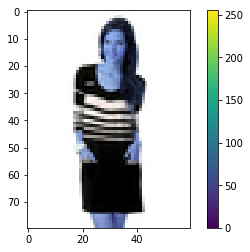

In [8]:
img = cv2.imread(new_path)
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
batch_size = 32

image_generator = ImageDataGenerator(
    validation_split=0.2
)

training_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory=DATASET_PATH + "images",
    x_col="image",
    y_col="subCategory",
    target_size=(96,96),
    batch_size=35536,
    class_mode="sparse",
    subset="training")

validation_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory=DATASET_PATH + "images",
    x_col="image",
    y_col="subCategory",
    target_size=(96,96),
    batch_size=8883,
    class_mode="sparse",
    subset="validation")

classes = len(training_generator.class_indices)

Found 35536 validated image filenames belonging to 45 classes.
Found 8883 validated image filenames belonging to 45 classes.


In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(96, 96, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(45, activation='softmax')])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
X_train, y_train = training_generator.next()
X_test, y_test = validation_generator.next()
X_train.shape

(35536, 96, 96, 3)

In [23]:
model.fit(X_train, y_train, epochs=10)

Train on 35536 samples
Epoch 1/10
35536/35536 [==============================] - 12s 333us/sample - loss: 78.9301 - accuracy: 0.2981
Epoch 2/10
35536/35536 [==============================] - 11s 299us/sample - loss: 2.7893 - accuracy: 0.3461
Epoch 3/10
35536/35536 [==============================] - 11s 301us/sample - loss: 2.5500 - accuracy: 0.3461
Epoch 4/10
35536/35536 [==============================] - 11s 305us/sample - loss: 2.4814 - accuracy: 0.3461
Epoch 5/10
35536/35536 [==============================] - 11s 313us/sample - loss: 2.4600 - accuracy: 0.3461
Epoch 6/10
35536/35536 [==============================] - 11s 309us/sample - loss: 2.4502 - accuracy: 0.3461
Epoch 7/10
35536/35536 [==============================] - 11s 303us/sample - loss: 2.4450 - accuracy: 0.3461
Epoch 8/10
35536/35536 [==============================] - 10s 291us/sample - loss: 2.4422 - accuracy: 0.3461
Epoch 9/10
35536/35536 [==============================] - 11s 305us/sample - loss: 2.4407 - accuracy: 0.

In [24]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

8883/8883 - 1s - loss: 2.4266 - accuracy: 0.3490

Test accuracy: 0.3489812
